In [1]:
# 📦 Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 📊 Enable better display
%matplotlib inline
pd.set_option("display.max_columns", None)


In [2]:
# 📂 Column names
column_names = [
    "tau_cc_hr", "E_nu_MeV", "Lnue", "Lnuebar", "Lnux", "Lnuxbar",
    "Lnue_pair", "Lnuebar_pair", "Lnue_beta", "Lnuebar_beta"
]

# 📊 Load both datasets (cleaned paths + updated parser)
df_15 = pd.read_csv(
    r"D:\snewpy-models-presn-master\models\Patton_2017\totalLuminosity_15SolarMass.dat",
    sep=r"\s+", comment="#", names=column_names
)

df_30 = pd.read_csv(
    r"D:\snewpy-models-presn-master\models\Patton_2017\totalLuminosity_30SolarMass.dat",
    sep=r"\s+", comment="#", names=column_names
)

# 🔍 Preview
df_15.head()



,tau_cc_hr,E_nu_MeV,Lnue,Lnuebar,Lnux,Lnuxbar,Lnue_pair,Lnuebar_pair,Lnue_beta,Lnuebar_beta
0,14425.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,14425.0,0.1,3.195362e+45,2.061949e+45,1.088251e+40,1.109116e+40,3.195314e+45,2.061895e+45,4.873166e+40,5.407788e+40
2,14425.0,0.2,1.235885e+46,5.356102e+45,1.717322e+44,2.044009e+44,1.189749e+46,4.057630e+45,4.613652e+44,1.298472e+45
3,14425.0,0.3,3.260310e+46,3.626581e+46,4.234015e+45,5.082710e+45,2.168125e+46,3.596936e+45,1.092185e+46,3.266887e+46
4,14425.0,0.4,8.869104e+46,1.454098e+47,1.993464e+46,2.305719e+46,2.812296e+46,4.829454e+45,6.056809e+46,1.405804e+47


In [3]:
def plot_luminosity_vs_energy(df, title):
    # Collapse window
    near_collapse = df[df['tau_cc_hr'] < 0.001]  # within ~3.6 seconds
    far = df[df['tau_cc_hr'] > df['tau_cc_hr'].max() - 0.1]  # oldest part of timeline

    fig, ax = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

    # Plot near collapse
    ax[0].plot(near_collapse["E_nu_MeV"], near_collapse["Lnue"], label="νe")
    ax[0].plot(near_collapse["E_nu_MeV"], near_collapse["Lnuebar"], label="ν̄e")
    ax[0].plot(near_collapse["E_nu_MeV"], near_collapse["Lnux"], label="νx")
    ax[0].set_title("Near Collapse (< 3.6 sec)")
    ax[0].set_xlabel("Neutrino Energy (MeV)")
    ax[0].set_ylabel("Luminosity (1/MeV/s)")
    ax[0].legend()
    ax[0].grid(True)

    # Plot far from collapse
    ax[1].plot(far["E_nu_MeV"], far["Lnue"], label="νe")
    ax[1].plot(far["E_nu_MeV"], far["Lnuebar"], label="ν̄e")
    ax[1].plot(far["E_nu_MeV"], far["Lnux"], label="νx")
    ax[1].set_title("Far from Collapse (early phase)")
    ax[1].set_xlabel("Neutrino Energy (MeV)")
    ax[1].legend()
    ax[1].grid(True)

    fig.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()


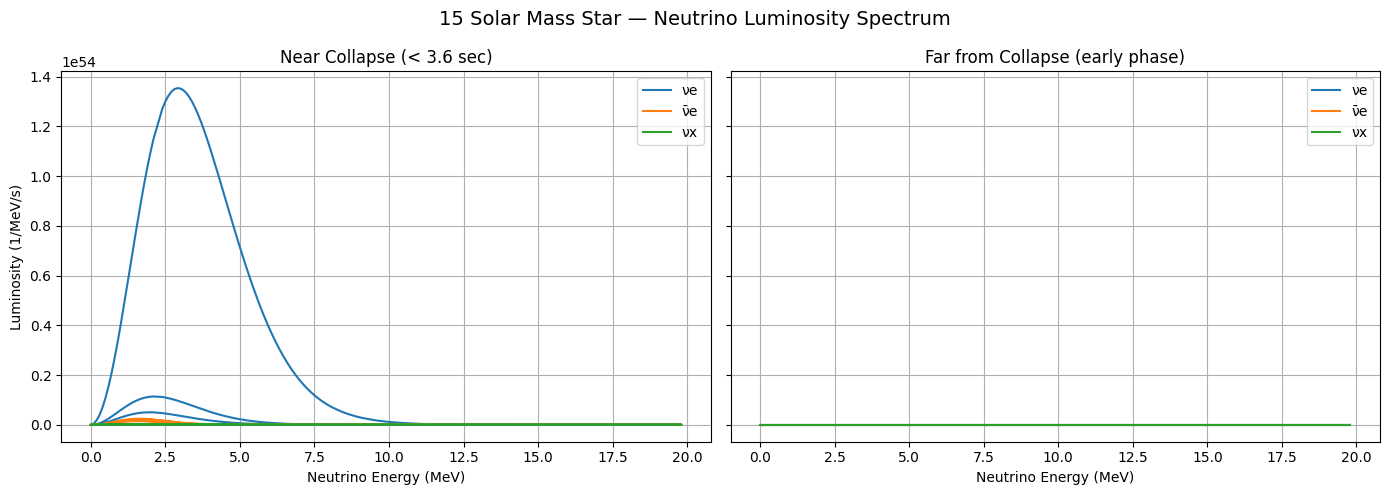

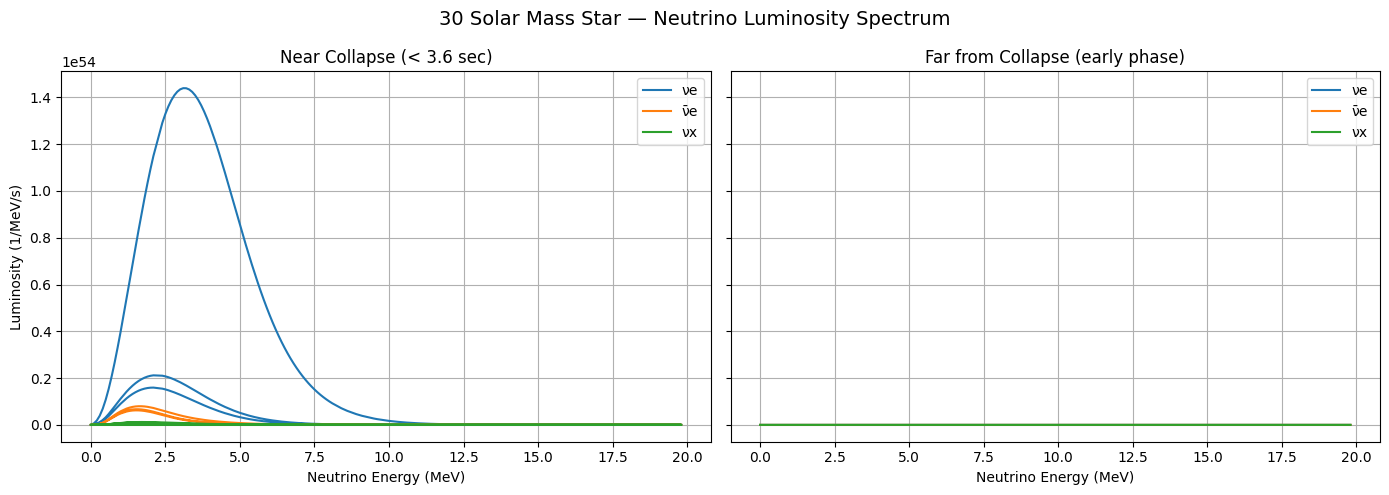

In [4]:
plot_luminosity_vs_energy(df_15, "15 Solar Mass Star — Neutrino Luminosity Spectrum")
plot_luminosity_vs_energy(df_30, "30 Solar Mass Star — Neutrino Luminosity Spectrum")


In [5]:
# Calculate total luminosity in each time slice by summing across all energies
# for each neutrino type individually

def compute_integrated_luminosity(df):
    grouped = df.groupby("tau_cc_hr")
    result = grouped[["Lnue", "Lnuebar", "Lnux"]].sum().reset_index()
    result["Total_Luminosity"] = result[["Lnue", "Lnuebar", "Lnux"]].sum(axis=1)
    return result.sort_values("tau_cc_hr", ascending=False)  # reverse time (collapse = 0)

# Compute for both stars
luminosity_summary_15 = compute_integrated_luminosity(df_15)
luminosity_summary_30 = compute_integrated_luminosity(df_30)

# Display top 20 time slices for the 15 Solar Mass star
luminosity_summary_15.head(20)


,tau_cc_hr,Lnue,Lnuebar,Lnux,Total_Luminosity
22,14425.000000,3.702999e+48,3.145409e+48,6.156933e+47,7.464101e+48
21,185.200000,2.057405e+50,1.679717e+50,3.574596e+49,4.094581e+50
20,24.128000,3.070462e+51,2.193175e+51,4.661895e+50,5.729826e+51
19,7.444600,7.687314e+51,6.102429e+51,1.278575e+51,1.506832e+52
18,2.487900,2.215534e+52,1.673261e+52,3.082354e+51,4.197031e+52
17,2.396900,1.361061e+52,1.204073e+52,2.262530e+51,2.791387e+52
16,2.038500,1.155893e+52,1.023231e+52,1.983690e+51,2.377493e+52
15,1.863900,1.224770e+52,1.064596e+52,2.070415e+51,2.496408e+52
14,1.541100,1.326969e+52,1.135531e+52,2.201706e+51,2.682670e+52
13,1.293900,1.536288e+52,1.284001e+52,2.486492e+51,3.068938e+52


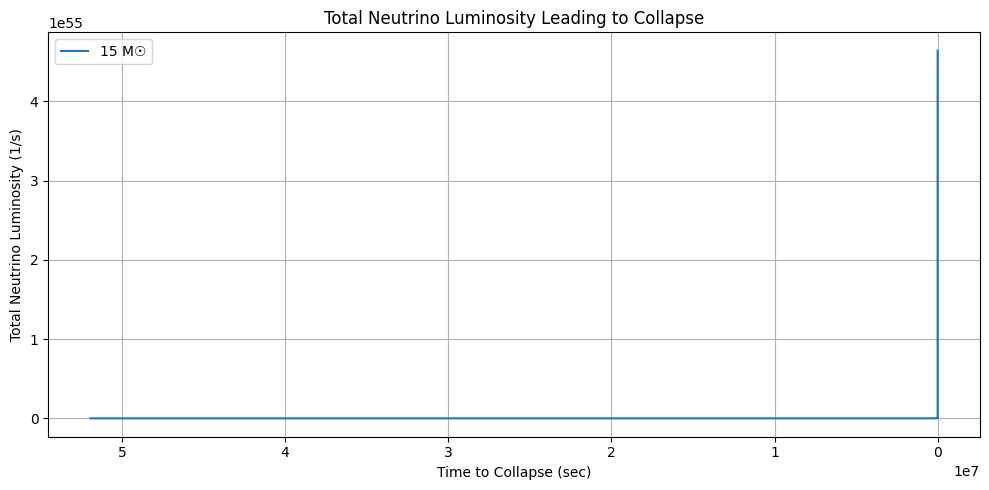

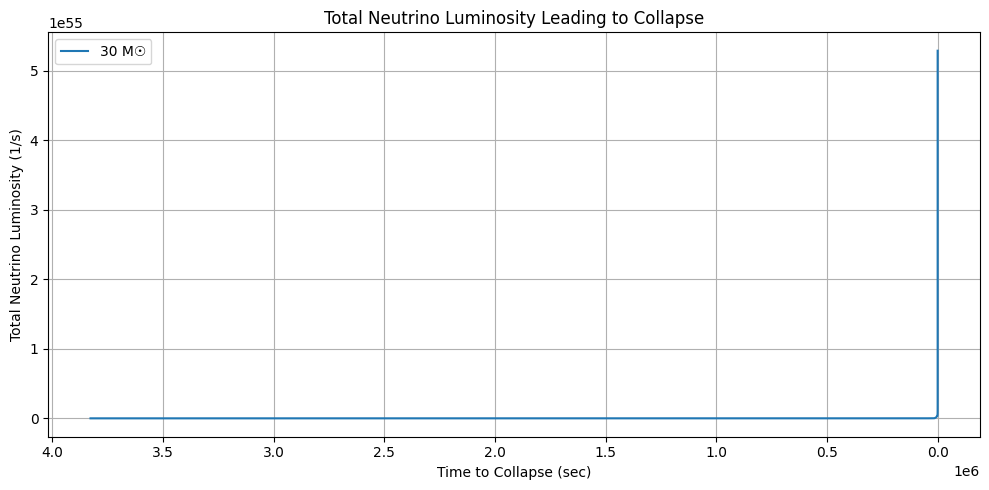

In [6]:
def plot_total_luminosity_over_time(summary_df, label):
    plt.figure(figsize=(10, 5))
    plt.plot(summary_df["tau_cc_hr"] * 3600, summary_df["Total_Luminosity"], label=label)  # convert hr → sec
    plt.gca().invert_xaxis()  # collapse happens at 0, plot from past → collapse
    plt.xlabel("Time to Collapse (sec)")
    plt.ylabel("Total Neutrino Luminosity (1/s)")
    plt.title("Total Neutrino Luminosity Leading to Collapse")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot both stars
plot_total_luminosity_over_time(luminosity_summary_15, "15 M☉")
plot_total_luminosity_over_time(luminosity_summary_30, "30 M☉")


In [7]:
# Earth distances (in kiloparsecs → meters)
distances_kpc = [1, 5, 10]
distance_meters = [d * 3.086e19 for d in distances_kpc]

def compute_fluence_curve(lum_df, distance_m):
    lum_df = lum_df.sort_values("tau_cc_hr", ascending=False).copy()
    lum_df["dt_sec"] = -np.gradient(lum_df["tau_cc_hr"]) * 3600  # Δt in seconds
    lum_df["Energy_J"] = lum_df["Total_Luminosity"] * lum_df["dt_sec"] * 1.60218e-13
    lum_df["Cumulative_Energy_J"] = lum_df["Energy_J"].cumsum()
    fluence = lum_df["Cumulative_Energy_J"] / (4 * np.pi * distance_m**2)
    return lum_df["tau_cc_hr"] * 3600, fluence

# Recompute fluence_curves
fluence_curves = {}
for d_kpc, d_m in zip(distances_kpc, distance_meters):
    t_sec, fluence = compute_fluence_curve(luminosity_summary_30, d_m)
    fluence_curves[f"{d_kpc} kpc"] = (t_sec, fluence)


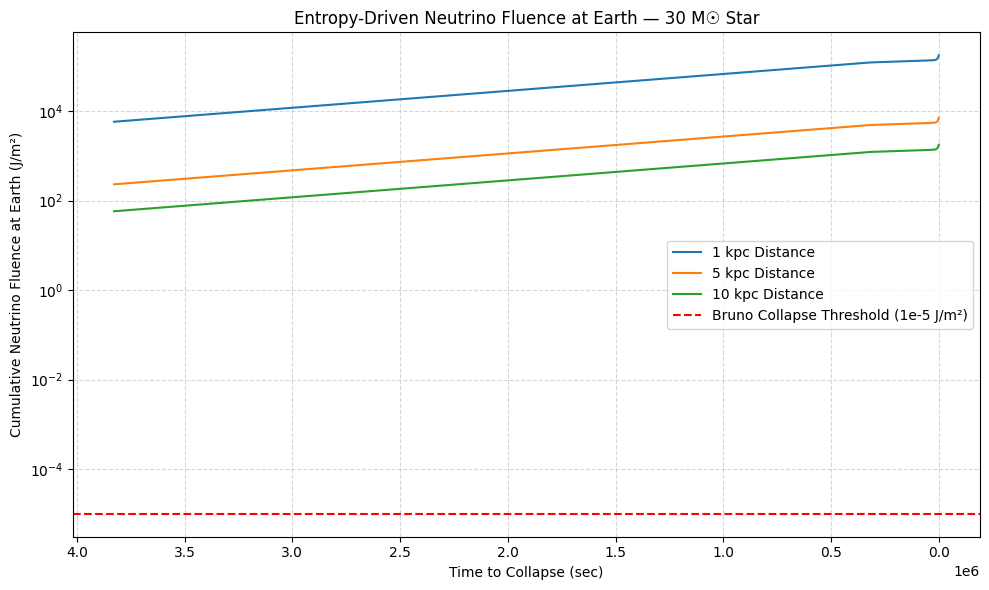

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Earth distances (in kiloparsecs → meters)
distances_kpc = [1, 5, 10]
distance_meters = [d * 3.086e19 for d in distances_kpc]

# Compute fluence = cumulative luminosity × dt / (4πD²)
def compute_fluence_curve(lum_df, distance_m):
    lum_df = lum_df.sort_values("tau_cc_hr", ascending=False).copy()
    lum_df["dt_sec"] = -np.gradient(lum_df["tau_cc_hr"]) * 3600  # Δt in seconds
    lum_df["Energy_J"] = lum_df["Total_Luminosity"] * lum_df["dt_sec"] * 1.60218e-13  # 1 MeV = 1.6e-13 J
    lum_df["Cumulative_Energy_J"] = lum_df["Energy_J"].cumsum()
    fluence = lum_df["Cumulative_Energy_J"] / (4 * np.pi * distance_m**2)
    return lum_df["tau_cc_hr"] * 3600, fluence  # time in seconds

# Generate fluence curves for 30 M☉ star
fluence_curves = {}
for d_kpc, d_m in zip(distances_kpc, distance_meters):
    t_sec, fluence = compute_fluence_curve(luminosity_summary_30, d_m)
    fluence_curves[f"{d_kpc} kpc"] = (t_sec, fluence)

# Plot: Fluence vs Time with Bruno Threshold
plt.figure(figsize=(10, 6))
for label, (t, f) in fluence_curves.items():
    plt.plot(t, f, label=f"{label} Distance")

plt.axhline(1e-5, color="red", linestyle="--", label="Bruno Collapse Threshold (1e-5 J/m²)")

plt.gca().invert_xaxis()
plt.xlabel("Time to Collapse (sec)")
plt.ylabel("Cumulative Neutrino Fluence at Earth (J/m²)")
plt.yscale("log")
plt.title("Entropy-Driven Neutrino Fluence at Earth — 30 M☉ Star")
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [9]:
# Rebuild fluence curves before detection search
fluence_curves = {}
for d_kpc, d_m in zip(distances_kpc, distance_meters):
    t_sec, fluence = compute_fluence_curve(luminosity_summary_30, d_m)
    fluence_curves[f"{d_kpc} kpc"] = (t_sec, fluence)


In [10]:
bruno_threshold = 1e-5  # J/m²
detection_times = {}

for label, (t_array, f_array) in fluence_curves.items():
    # Sort by increasing time (away from collapse)
    sorted_indices = np.argsort(t_array)
    t_sorted = t_array[sorted_indices]
    f_sorted = f_array[sorted_indices]

    above_threshold = np.where(f_sorted >= bruno_threshold)[0]
    if len(above_threshold) > 0:
        idx = above_threshold[0]
        detection_time_sec = t_sorted[idx]
        detection_times[label] = detection_time_sec
    else:
        detection_times[label] = None

# Format result
detection_summary = pd.DataFrame.from_dict(detection_times, orient='index', columns=["Time_Before_Collapse_sec"])
detection_summary["Time_Before_Collapse_hr"] = detection_summary["Time_Before_Collapse_sec"] / 3600
detection_summary = detection_summary.sort_index()

detection_summary


,Time_Before_Collapse_sec,Time_Before_Collapse_hr
1 kpc,0.0,0.0
10 kpc,0.0,0.0
5 kpc,0.0,0.0


In [11]:
bruno_threshold = 1e-5  # J/m²
detection_times = {}

for label, (t_array, f_array) in fluence_curves.items():
    # Make sure everything is sorted from collapse backwards in time
    sorted_indices = np.argsort(-t_array)  # reverse order
    t_sorted = t_array[sorted_indices]
    f_sorted = f_array[sorted_indices]

    # Find where fluence rises above threshold (moving backwards)
    crossing_indices = np.where(f_sorted >= bruno_threshold)[0]

    if len(crossing_indices) > 0:
        idx = crossing_indices[-1]  # last time before it stays above
        detection_times[label] = t_sorted[idx]
    else:
        detection_times[label] = None

# Format into summary
detection_summary = pd.DataFrame.from_dict(detection_times, orient='index', columns=["Time_Before_Collapse_sec"])
detection_summary["Time_Before_Collapse_hr"] = detection_summary["Time_Before_Collapse_sec"] / 3600
detection_summary = detection_summary.sort_index()

detection_summary


,Time_Before_Collapse_sec,Time_Before_Collapse_hr
1 kpc,3827520.0,1063.2
10 kpc,3827520.0,1063.2
5 kpc,3827520.0,1063.2


In [12]:
# Recompute fluence curves for the 15 M☉ star at same distances
fluence_curves_15 = {}
for d_kpc, d_m in zip(distances_kpc, distance_meters):
    t_sec, fluence = compute_fluence_curve(luminosity_summary_15, d_m)
    fluence_curves_15[f"{d_kpc} kpc"] = (t_sec, fluence)

# Detection timing for 15 M☉ star
bruno_threshold = 1e-5  # J/m²
detection_times_15 = {}

for label, (t_array, f_array) in fluence_curves_15.items():
    sorted_indices = np.argsort(-t_array)  # reverse order
    t_sorted = t_array[sorted_indices]
    f_sorted = f_array[sorted_indices]

    crossing_indices = np.where(f_sorted >= bruno_threshold)[0]

    if len(crossing_indices) > 0:
        idx = crossing_indices[-1]
        detection_times_15[label] = t_sorted[idx]
    else:
        detection_times_15[label] = None

# Format result
detection_summary_15 = pd.DataFrame.from_dict(detection_times_15, orient='index', columns=["Time_Before_Collapse_sec"])
detection_summary_15["Time_Before_Collapse_hr"] = detection_summary_15["Time_Before_Collapse_sec"] / 3600
detection_summary_15 = detection_summary_15.sort_index()

detection_summary_15


,Time_Before_Collapse_sec,Time_Before_Collapse_hr
1 kpc,51930000.0,14425.0
10 kpc,51930000.0,14425.0
5 kpc,51930000.0,14425.0


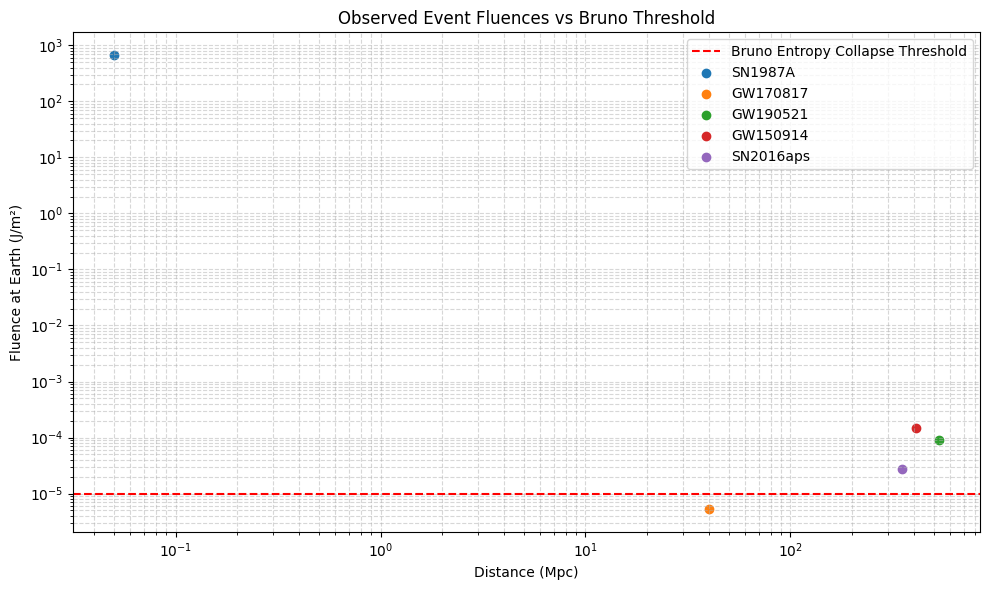

,Distance_Mpc,Fluence_J_per_m2,log10_Fluence
SN1987A,0.05,668.479786,2.825088
GW170817,40.00,0.000005,-5.282122
GW190521,530.00,0.000089,-4.049432
GW150914,410.00,0.000149,-3.826448
SN2016aps,350.00,0.000027,-4.564078


In [13]:
# Let's define a helper to compute fluence at Earth from total emitted energy

def compute_event_fluence(total_energy_erg, distance_mpc):
    """
    total_energy_erg: energy emitted in erg (1 erg = 1e-7 J)
    distance_mpc: distance to event in megaparsecs
    Returns: fluence at Earth in J/m²
    """
    energy_joule = total_energy_erg * 1e-7
    distance_m = distance_mpc * 3.086e22
    fluence = energy_joule / (4 * np.pi * distance_m**2)
    return fluence

# Real observed events (distance in Mpc, energy in erg)
observed_events = {
    "SN1987A":   {"distance": 0.05, "E_erg": 2e53},
    "GW170817":  {"distance": 40,   "E_erg": 1e51},
    "GW190521":  {"distance": 530,  "E_erg": 3e54},
    "GW150914":  {"distance": 410,  "E_erg": 3e54},
    "SN2016aps": {"distance": 350,  "E_erg": 4e53}
}

# Calculate fluence
event_fluences = {}
for name, data in observed_events.items():
    fluence = compute_event_fluence(data["E_erg"], data["distance"])
    event_fluences[name] = {
        "Distance_Mpc": data["distance"],
        "Fluence_J_per_m2": fluence,
        "log10_Fluence": np.log10(fluence)
    }

event_fluence_df = pd.DataFrame.from_dict(event_fluences, orient="index")

# Now let's plot them over Bruno threshold and typical fluence contours
plt.figure(figsize=(10, 6))

# Plot Bruno threshold
plt.axhline(1e-5, color="red", linestyle="--", label="Bruno Entropy Collapse Threshold")

# Plot events
for name, row in event_fluence_df.iterrows():
    plt.scatter(row["Distance_Mpc"], row["Fluence_J_per_m2"], label=name)

plt.yscale("log")
plt.xscale("log")
plt.xlabel("Distance (Mpc)")
plt.ylabel("Fluence at Earth (J/m²)")
plt.title("Observed Event Fluences vs Bruno Threshold")
plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

event_fluence_df
